In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import tqdm

plt.style.use(['science', 'grid', 'notebook'])

Datos para entrenamiento

In [2]:
# entradas de la compuerta
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# salidas
Y = np.array([0, 1, 1, 0])

print(X.shape, Y.shape)

(4, 2) (4,)


In [68]:
activation = lambda h: np.tanh(h)
derivate_act = lambda h: 1 - np.tanh(h)**2

def begin(NI, NH, No, seed = 42):  # prepara los coeficientes de la red
    # # Semilla aleatoria para reproducibilidad
    # np.random.seed(seed)

    # red totalmente conectada con NI entrdas, NH capas ocultas y NO salidas
    # weights
    w_ih = np.random.rand(NI, NH)
    w_ho = np.random.rand(NH, No)
    #bias
    b0 = np.random.rand(NH)
    b1 = np.random.rand(No)

    return (w_ih, w_ho, b0, b1)
    

#Definicion de la red
def NN(x, w_ih, w_ho, b0, b1):
    Vj = activation(np.dot(x, w_ih) + b0)
    oi = activation(np.dot(Vj, w_ho) + b1)

    return oi

def train(epochs, x_train, y_train, lr, w_ih, w_ho, b0, b1, act, grad_act, mse_convergence = 0.05, batch_size=32, epsilon=0.01):
    accuracies = np.zeros(epochs)
    mse = np.zeros(epochs)
    convergence_time = 0

    num_samples = x_train.shape[0]
    convergence_flag = False

    for i in range(epochs):
        grad_w_0_1 = np.zeros_like(w_ih)
        grad_w_1_2 = np.zeros_like(w_ho)
        grad_b0 = np.zeros_like(b0)
        grad_b1 = np.zeros_like(b1)

        # Divido el conjunto de datos en mini-batches
        indices = np.random.permutation(num_samples)  # Barajo los datos
        x_shuffled = x_train[indices]
        y_shuffled = y_train[indices]

        for start in range(0, num_samples, batch_size):
            # Seleccionar el batch
            end = min(start + batch_size, num_samples)
            x_batch = x_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            # Forward projection (vectorizado)
            hj = np.dot(x_batch, w_ih) + b0  # (batch_size, NH)
            Vj = act(hj)  # Activación de la capa oculta
            hi = np.dot(Vj, w_ho) + b1  # (batch_size, No)
            oi = act(hi)  # Salida de la red

            # Backprojection (vectorizado)
            # Calculo de gradientes de salida (output -> hidden)
            delta_i_mu = grad_act(hi) * (y_batch[:, np.newaxis] - oi)  # (batch_size, No)
            grad_w_1_2 += np.dot(Vj.T, delta_i_mu)  # (NH, No)
            grad_b1 += np.sum(delta_i_mu, axis=0)  # (No,)

            # Calculo de gradientes de la capa oculta (hidden -> input)
            delta_j_mu = grad_act(hj) * np.dot(delta_i_mu, w_ho.T)  # (batch_size, NH)
            grad_w_0_1 += np.dot(x_batch.T, delta_j_mu)  # (NI, NH)
            grad_b0 += np.sum(delta_j_mu, axis=0)  # (NH,)

            # Métricas
            accuracies[i] += np.sum(np.abs(oi.flatten() - y_batch) < epsilon)  # Accuracy
            mse[i] += np.sum((oi.flatten() - y_batch) ** 2)  # MSE

            # Actualizo los pesos
            w_ih += lr * grad_w_0_1
            w_ho += lr * grad_w_1_2
            b0 += lr * grad_b0
            b1 += lr * grad_b1

        if mse[i] <= mse_convergence and not convergence_flag:
            convergence_time = i
            convergence_flag = True

    if convergence_time == 0:
        convergence_time = np.nan
    metrics = {'accuracy': accuracies / len(y_train), 'mse': mse / len(y_train), 'convergence_time': convergence_time}

    return w_ih, w_ho, b0, b1, metrics


In [131]:
epochs = 2000

NI, NH = 2, 2
No = 1
learning_rate = 0.1

n_sorts = 10

accuracies = np.empty((n_sorts, epochs))
mses = np.empty((n_sorts, epochs))
times = np.empty(n_sorts)

seeds = [45, 32, 12, 98, 69, 2, 21, 17, 32, 71]

# Semilla aleatoria para reproducibilidad
np.random.seed(12)

for i in range(n_sorts):
    # BEGIN
    weights = begin(NI, NH, No)
    #TRAIN
    w_ih, w_ho, b0, b1, metrics = train(epochs, X, Y, learning_rate, *weights, activation, derivate_act,batch_size=4,  epsilon=0.1, mse_convergence=0.01)
    
    # TEST
    print('Sort: ', i)
    for j in range(X.shape[0]):
        x = X[j]
        y = Y[j]
        y_pred = NN(x, w_ih, w_ho, b0, b1)
        print(f'Input {x}, Output {y}, Predicted {y_pred}')

    accuracies[i] = metrics['accuracy']
    mses[i] = metrics['mse']
    times[i] = metrics['convergence_time']

Sort:  0
Input [0 0], Output 0, Predicted [0.00080934]
Input [0 1], Output 1, Predicted [0.97853791]
Input [1 0], Output 1, Predicted [0.97850345]
Input [1 1], Output 0, Predicted [0.00138288]
Sort:  1
Input [0 0], Output 0, Predicted [0.00083609]
Input [0 1], Output 1, Predicted [0.97751798]
Input [1 0], Output 1, Predicted [0.97756084]
Input [1 1], Output 0, Predicted [0.00139663]
Sort:  2
Input [0 0], Output 0, Predicted [0.00089869]
Input [0 1], Output 1, Predicted [0.97617964]
Input [1 0], Output 1, Predicted [0.97627159]
Input [1 1], Output 0, Predicted [0.00165124]
Sort:  3
Input [0 0], Output 0, Predicted [0.00148677]
Input [0 1], Output 1, Predicted [0.96809225]
Input [1 0], Output 1, Predicted [0.96809227]
Input [1 1], Output 0, Predicted [0.00306691]
Sort:  4
Input [0 0], Output 0, Predicted [0.00083264]
Input [0 1], Output 1, Predicted [0.97805719]
Input [1 0], Output 1, Predicted [0.97793587]
Input [1 1], Output 0, Predicted [0.00144079]
Sort:  5
Input [0 0], Output 0, Pre

623.0
0.002490906584663204
675.0
0.0024913866838412275
859.0
0.002495069490275597
1407.0
0.0024944585797258235
676.0
0.002489178420851821
983.0
0.002486593052238031
603.0
0.002490588640768159
987.0
0.0024867146748663565
481.0
0.0024995736605971765
1277.0
0.0024889477695289055
Mean convergence time: 857.1 +- 28.951906672963702


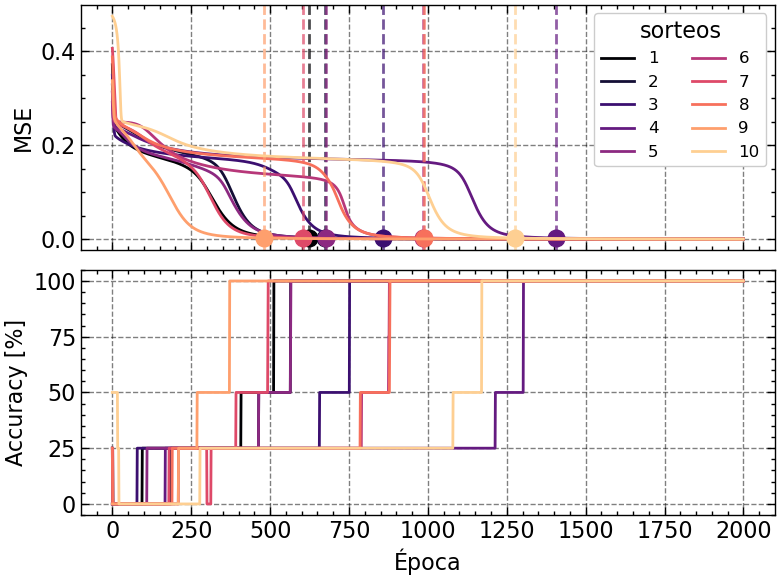

In [133]:
cm = plt.get_cmap('magma')

fig, ax = plt.subplots(2, 1, figsize=(8,6), sharex=True)

for i in range(n_sorts):
    ax[1].plot(accuracies[i]*100, label=i+1, color=cm(i/n_sorts))
    ax[0].plot(mses[i], label=i+1, color=cm(i/n_sorts))
    print(times[i])
    if not np.isnan(times[i]):
        print(mses[i][int(times[i])])
        ax[0].plot(times[i], mses[i][int(times[i])], 'o', color=cm(i/n_sorts), ms=12)
        ax[0].axvline(times[i], color=cm(i/n_sorts), linestyle='--', lw=2, alpha=0.7)
    else:
        print('No convergió')
    # ax[0].plot([times[i]], [mses[i][times[i]]], 'o')
    # ax[1].axvline(times[i], color=cm(i/n_sorts), linestyle='--')
    # plt.show()
    # plt.title(f'Sort {i+1}')

ax[0].legend(fontsize=12, ncols=2, title='sorteos')

ax[1].set_ylabel('Accuracy [%]')
ax[0].set_ylabel('MSE')
ax[1].set_xlabel('Época')
plt.tight_layout()

print(f'Mean convergence time: {times.mean()} +- {times.std()/len(times)}')
# plt.savefig('../doc/figures/metrics_e1_1.pdf', dpi=500)
# plt.yscale('log')